In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_2015=pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/marathon_results_2015.csv')
df_2016=pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/marathon_results_2016.csv')
df_2017=pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/marathon_results_2017.csv')

In [4]:
#concatenate datasets into a single Dataframe
df=pd.concat([df_2015,df_2016,df_2017])
print(df.head())

   Unnamed: 0 Bib                   Name  Age M/F         City State Country  \
0         0.0   3         Desisa, Lelisa   25   M         Ambo   NaN     ETH   
1         1.0   4  Tsegay, Yemane Adhane   30   M  Addis Ababa   NaN     ETH   
2         2.0   8         Chebet, Wilson   29   M     Marakwet   NaN     KEN   
3         3.0  11       Kipyego, Bernard   28   M      Eldoret   NaN     KEN   
4         4.0  10          Korir, Wesley   32   M       Kitale   NaN     KEN   

  Citizen Unnamed: 9  ...      30K      35K      40K     Pace Proj Time  \
0     NaN        NaN  ...  1:32:00  1:47:59  2:02:39  0:04:56         -   
1     NaN        NaN  ...  1:31:59  1:47:59  2:02:42  0:04:58         -   
2     NaN        NaN  ...  1:32:00  1:47:59  2:03:01  0:04:59         -   
3     NaN        NaN  ...  1:32:00  1:48:03  2:03:47  0:05:00         -   
4     NaN        NaN  ...  1:32:00  1:47:59  2:03:27  0:05:00         -   

  Official Time Overall Gender Division Unnamed: 8  
0       2:09:17

In [30]:
df[['Official_Hours','Official_Minutes','Official_Seconds']]=df['Official Time'].str.split(':',expand=True).astype(int)
df[['Pace_Hours','Pace_Minutes','Pace_Seconds']]=df['Pace'].str.split(':',expand=True).astype(int)
print(df[['Pace_Hours','Pace_Minutes','Pace_Seconds']].head)
print(df[['Official_Hours','Official_Minutes','Official_Seconds']].head)


<bound method NDFrame.head of        Pace_Hours  Pace_Minutes  Pace_Seconds
0               0             4            56
1               0             4            58
2               0             4            59
3               0             5             0
4               0             5             0
...           ...           ...           ...
26405           0            16            24
26406           0            16            40
26407           0            16            47
26408           0            16            49
26409           0            18            15

[79638 rows x 3 columns]>
<bound method NDFrame.head of        Official_Hours  Official_Minutes  Official_Seconds
0                   2                 9                17
1                   2                 9                48
2                   2                10                22
3                   2                10                47
4                   2                10                49
...          

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79638 entries, 0 to 26409
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              53008 non-null  float64
 1   Bib                     79638 non-null  object 
 2   Name                    79638 non-null  object 
 3   Age                     79638 non-null  int64  
 4   M/F                     79638 non-null  object 
 5   City                    79637 non-null  object 
 6   State                   70645 non-null  object 
 7   Country                 79638 non-null  object 
 8   Citizen                 3440 non-null   object 
 9   Unnamed: 9              158 non-null    object 
 10  5K                      79638 non-null  object 
 11  10K                     79638 non-null  object 
 12  15K                     79638 non-null  object 
 13  20K                     79638 non-null  object 
 14  Half                    79638 non-null  obj

In [46]:
#Convert the above two columns into seconds
df['total_seconds_official'] = df['Official_Hours'] * 3600+df['Official_Minutes'] *60+df['Official_Seconds']
df['total_seconds_pace'] = df['Pace_Hours'] * 3600+df['Pace_Minutes'] *60+df['Pace_Seconds']

In [47]:
#Calcualte Correalation
cor_overall=df[['total_seconds_official','total_seconds_official']].corr()

print("Overall corelation between pace and Official time:")
print(cor_overall)  

Overall corelation between pace and Official time:
                        total_seconds_pace  total_seconds_official
total_seconds_pace                1.000000                0.999667
total_seconds_official            0.999667                1.000000


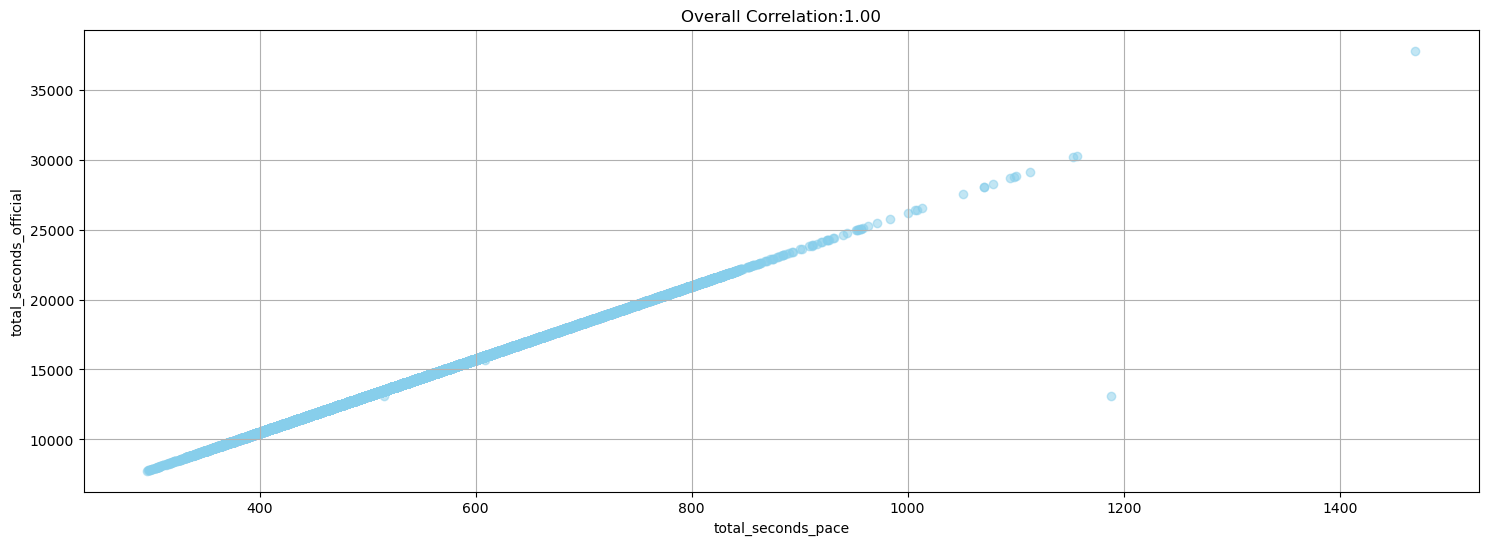

In [53]:
#create scatter plots with corelation values
fig,axes=plt.subplots(1,figsize=(18,6))
#overall data plot
axes.scatter(df['total_seconds_pace'],df['total_seconds_official'],color='skyblue',alpha=0.5)
axes.set_title(f'Overall Correlation:{cor_overall.loc['total_seconds_official','total_seconds_official']:.2f}')
axes.set_xlabel('total_seconds_pace')
axes.set_ylabel('total_seconds_official')
axes.grid(True)



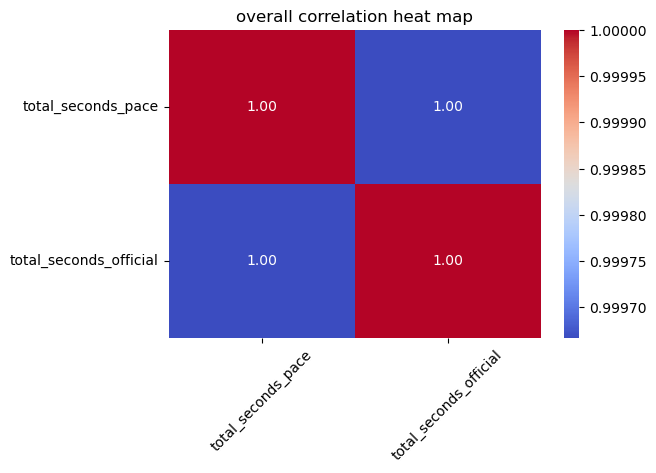

In [54]:
#heatmap
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cor_overall,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("overall correlation heat map")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()